# Overfitting and Underfitting
## https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

## Program for understanding Overfitting and Underfitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [4]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

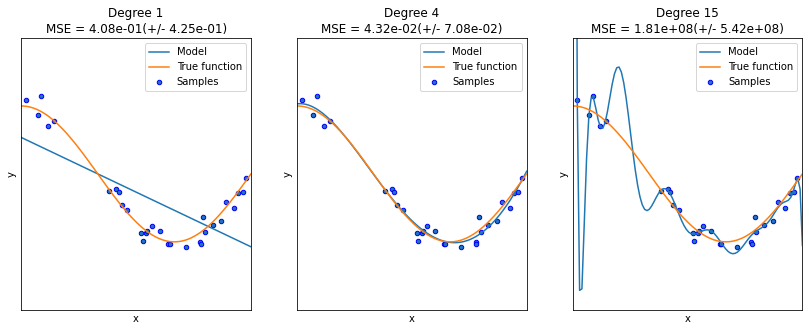

In [5]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## Overfitting (Printing accuracy at different steps)
## https://machinelearningmastery.com/overfitting-machine-learning-models/

In [6]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [65]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [66]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [43]:
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 31)]

In [44]:
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.970, test: 0.970
>2, train: 0.974, test: 0.971
>3, train: 0.975, test: 0.972
>4, train: 0.976, test: 0.969
>5, train: 0.978, test: 0.970
>6, train: 0.980, test: 0.969
>7, train: 0.982, test: 0.967
>8, train: 0.983, test: 0.966
>9, train: 0.986, test: 0.965
>10, train: 0.987, test: 0.963
>11, train: 0.990, test: 0.962
>12, train: 0.992, test: 0.960
>13, train: 0.993, test: 0.962
>14, train: 0.994, test: 0.960
>15, train: 0.995, test: 0.959
>16, train: 0.997, test: 0.959
>17, train: 0.997, test: 0.959
>18, train: 0.998, test: 0.957
>19, train: 0.999, test: 0.957
>20, train: 0.999, test: 0.956
>21, train: 1.000, test: 0.956
>22, train: 1.000, test: 0.956
>23, train: 1.000, test: 0.955
>24, train: 1.000, test: 0.955
>25, train: 1.000, test: 0.956
>26, train: 1.000, test: 0.957
>27, train: 1.000, test: 0.957
>28, train: 1.000, test: 0.956
>29, train: 1.000, test: 0.955
>30, train: 1.000, test: 0.955


# -------------------------------------------------------------------------------------------------------------

# Cross-validation

## https://scikit-learn.org/stable/modules/cross_validation.html

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

### Basic method to compute score

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)



0.9666666666666667

### Estimate the accuracy by splitting the data, computing the score 5 consecutive times (with different splits each time)



In [71]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [72]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


### Using the different scoring parameter

In [73]:
from sklearn import metrics

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores



array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

### Specified multiple metrics of predefined scorer names

In [74]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
sorted(scores.keys())

scores['test_recall_macro']

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

### Calculate cross validation score by passing a cross validation iterator 

In [75]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)


array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

### Use an iterable yielding (train, test) splits as arrays of indices

In [76]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, y, cv=custom_cv)

array([1.        , 0.97333333])

## Different type of Cross validation iterators


### K-fold


In [77]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))


[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74] [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 13

### Repeated K-Fold

In [78]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))


[  2   4   5   7   8   9  12  13  14  15  16  18  19  20  27  28  29  30
  31  33  34  36  37  38  40  42  45  46  49  50  51  53  56  59  60  62
  63  68  69  73  74  75  78  80  84  86  87  88  89  91  95  96  97  98
  99 100 102 103 104 105 112 115 116 120 126 129 135 138 139 141 142 143
 144 145 147] [  0   1   3   6  10  11  17  21  22  23  24  25  26  32  35  39  41  43
  44  47  48  52  54  55  57  58  61  64  65  66  67  70  71  72  76  77
  79  81  82  83  85  90  92  93  94 101 106 107 108 109 110 111 113 114
 117 118 119 121 122 123 124 125 127 128 130 131 132 133 134 136 137 140
 146 148 149]
[  0   1   3   6  10  11  17  21  22  23  24  25  26  32  35  39  41  43
  44  47  48  52  54  55  57  58  61  64  65  66  67  70  71  72  76  77
  79  81  82  83  85  90  92  93  94 101 106 107 108 109 110 111 113 114
 117 118 119 121 122 123 124 125 127 128 130 131 132 133 134 136 137 140
 146 148 149] [  2   4   5   7   8   9  12  13  14  15  16  18  19  20  27  28  29  30
  31  33 

### Leave One Out (LOO)

In [79]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))



[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 

# -------------------------------------------------------------------------------------------------------------


### Leave P Out (LPO)

In [80]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=2)
for train, test in lpo.split(X):
  print("%s %s" % (train, test))

Streaming output truncated to the last 5000 lines.
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 117 118 119 120 121 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149] [116 122]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 117 118 119 120 121 122 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149] [116 123]
[  0   1   2   3 

### Stratified k-fold

In [81]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
skf = StratifiedKFold(n_splits=3)
print("Stratified k-fold")
for train, test in skf.split(X, y):
  print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))
print(" k-fold")
kf = KFold(n_splits=3)
for train, test in kf.split(X, y):
  print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))

Stratified k-fold
train -  [33 33 34]   |   test -  [17 17 16]
train -  [33 34 33]   |   test -  [17 16 17]
train -  [34 33 33]   |   test -  [16 17 17]
 k-fold
train -  [ 0 50 50]   |   test -  [50]
train -  [50  0 50]   |   test -  [ 0 50]
train -  [50 50]   |   test -  [ 0  0 50]


### Stratified Shuffle split

In [87]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)
print(sss)

StratifiedShuffleSplit(n_splits=5, random_state=0)
for train_index, test_index in sss.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)
TRAIN: [ 16  69  15   4  78 138 111  10  93  45  74  58 106  22  56  28 107  27
  94  72  66  33 143  87  96 115  73  84  26 126  11  91 128 105  79  48
   7 148  31 119  59 124  38  57  95 101  83 137 112  52  92  30  63  42
  14 108 125 122 141  32 140  35  76  41   2  18 146 135 127 116  80  29
 104  82  34] TEST: [139  65 145   6 129  25  85  23 118  64  17 121  71  39  67  36 131 149
  24   0  89   8 136 110 132 147 117   9 130  75 134 144  97 114  19  43
  49  21  50  86  37  20  61  81   5 123  44  99  77 102  98   3 142  40
  88  60  12 103  53 109  90 133  70 100  13  47  54   1  51  68 113  62
 120  46  55]
TRAIN: [  7  10 141   6  94  31 113 140 108  11 128  96 149 110  98   4 101  44
   5   2 144 102 112  86  41  20  59 118 148 115  99 132  88  57 105 103
  83  45 138  62  74  81  52  13 114  67  40  47  82  33 106  38  18 135
  63  75  79  37  55  72  70 111  95 142  15  64 121  

# Validation curve

## https://keeeto.github.io/blog/bias_variance/
## https://scikit-learn.org/stable/modules/learning_curve.html

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve


In [59]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_comb = df_train.append(df_test)

X = pd.DataFrame()


In [60]:
def encode_sex(x):
    return 1 if x == 'female' else 0

def family_size(x):
    size = x.SibSp + x.Parch 
    return 4 if size > 3 else size

X['Sex'] = df_comb.Sex.map(encode_sex)
X['Pclass'] = df_comb.Pclass
X['FamilySize'] = df_comb.apply(family_size, axis=1)

In [61]:
fare_median = df_train.groupby(['Sex', 'Pclass']).Fare.median()
fare_median.name = 'FareMedian'

age_mean = df_train.groupby(['Sex', 'Pclass']).Age.mean()
age_mean.name = 'AgeMean'

def join(df, stat):
    return pd.merge(df, stat.to_frame(), left_on=['Sex', 'Pclass'], right_index=True, how='left')

X['Fare'] = df_comb.Fare.fillna(join(df_comb, fare_median).FareMedian)
X['Age'] = df_comb.Age.fillna(join(df_comb, age_mean).AgeMean)

In [62]:
def quantiles(series, num):
    return pd.qcut(series, num, retbins=True)[1]

def discretize(series, bins):
    return pd.cut(series, bins, labels=range(len(bins)-1), include_lowest=True)
    
X['Fare'] = discretize(X.Fare, quantiles(df_comb.Fare, 10))
X['Age'] = discretize(X.Age, quantiles(df_comb.Age, 10))


In [31]:
X_train = X.iloc[:df_train.shape[0]]
X_test = X.iloc[df_train.shape[0]:]

y_train = df_train.Survived


In [33]:
clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0)
clf_1.fit(X_train, y_train)
# Number of folds for cross validation
num_folds = 7

In [34]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Validation score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()


In [35]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()
    

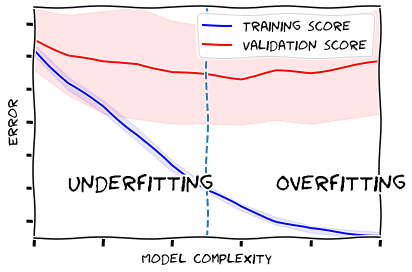

In [36]:
plot_validation_curve(clf_1, X_train, y_train, param_name='max_depth', param_range=range(2,13))


# -------------------------------------------------------------------------------------------------------------


# ROC
## https://www.statology.org/plot-roc-curve-python/

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [38]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

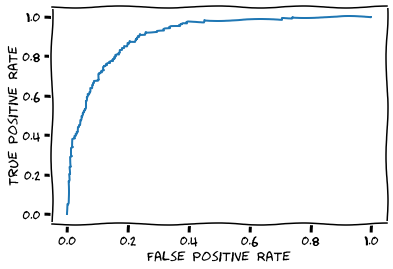

In [39]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Task 1: Perform all of the above codes of Overfitting, Cross Validation, etc. with the help of the given reference link.

# Task 2: Explain your analysis of the code. Make a detailed analysis that can also cover the following questions: (Submit the PDF of Report)

###             1) According to you, why do overfitting and underfitting occur, and how resolve them? What is the difference between them?
###             2) What kind of pattern did you analyze in the Train and Test score while running the code of overfitting?
###             3) What is cross-validation, and what did you analyze in a different type of validation that you performed?
###             4) Explain the analysis from generated ROC and validation curve and what they represent?

# Task 3: Using the given Cross Validation iterators perform all types of Cross Validations we did in the task :
	
###             1) K-fold
###             2) Repeated K-Fold
###             3) Leave One Out (LOO)

## Apart from this three, try to perform validation using three new iterators.

# Task 4: With the help of the given code and references complete all of the following step:
  
###            1) Choose one new dataset. Train a overfitted model with the help of any machine learning technique, such as KNN, classification, regression.
###            2) Try to resolve the overfitting.
###            3) Calculate the Validation score by any two or three given techniques and Validation iterators.
###           4) Generate the validation curve 
###           5) Predict the output of testing data.
###           6) Generate the ROC curve using the predicted data and actual data.

	